In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#2nd submission with Randomforest model. EDA please refer to the first submission notebook.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Cleaning data:

def CLEAN(train):
    print(train.groupby(train['Age'].isnull()).median())

    print(train.groupby('Pclass')['Age'].describe())

    "Imputate the missing values for age based on the passenger class"
    
    for i,j in enumerate(train['Age'].isnull()):
        if train.loc[i,['Pclass']].values ==1:
            train.loc[i,['Age']] =train.loc[i,['Age']].fillna(38.233441)
        elif train.loc[i,['Pclass']].values ==2:
            train.loc[i,['Age']] =train.loc[i,['Age']].fillna(29.877630)
        else:
            train.loc[i,['Age']] =train.loc[i,['Age']].fillna(25.140620)


    train.groupby(train['Cabin'].isnull()).mean()
    train['Cabin'] = np.where(train['Cabin'].isnull(),0,1)

    train['title']= train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip() )
    li = ['Dr','Master','Miss','Mr','Mrs']

    train['title'] = train['title'].apply(lambda x : x if x in li else 'Other')

    train = train.drop(['Name','Ticket','PassengerId'],axis=1)

    print(train.head())

    from sklearn.preprocessing import LabelEncoder
    li = ['Sex','Embarked','title']

    train = train.dropna()

    for i in li:
      train[i] = LabelEncoder().fit_transform(train[i])

    train['family'] = train['SibSp']+train['Parch']
    train = train.drop(['SibSp','Parch'],axis=1)
    
    return train

In [4]:
train = CLEAN(train)

       PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
Age                                                              
False          445         0       2  28.0      0      0  15.7417
True           452         0       3   NaN      0      0   8.0500
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked title
0         0       3    male  22.0      1      0   7.2500      0        S    Mr
1         1       1  female  38.0      1      0  71.2833      1        C   Mrs
2         1       3  female  26.0      0      0   7.9250      0        S  Miss
3         1       1  female  35.0      1      0  53.1000      1        S   Mrs
4         0

In [5]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
title       0
family      0
dtype: int64

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
support = SVC(kernel='linear',random_state= 42)
random = RandomForestClassifier(random_state=42)

In [8]:
model = [support,random]

In [10]:
gender = pd.read_csv('gender_submission.csv')
test = pd.merge(test,gender,on='PassengerId')

In [11]:
feature = train.drop('Survived',axis=1)
label = train['Survived']

In [12]:
test = CLEAN(test)

       PassengerId  Pclass   Age  SibSp  Parch     Fare  Survived
Age                                                              
False       1099.5     2.0  27.0      0      0  16.0000         0
True        1105.5     3.0   NaN      0      0   7.9729         0
        count       mean        std   min   25%   50%    75%   max
Pclass                                                            
1        98.0  40.918367  13.956799  6.00  30.0  42.0  50.75  76.0
2        88.0  28.777500  12.943458  0.92  21.0  26.5  35.25  63.0
3       146.0  24.027945  10.537105  0.17  18.5  24.0  29.75  60.5
   Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked  Survived title
0       3    male  34.5      0      0   7.8292      0        Q         0    Mr
1       3  female  47.0      1      0   7.0000      0        S         1   Mrs
2       2    male  62.0      0      0   9.6875      0        Q         0    Mr
3       3    male  27.0      0      0   8.6625      0        S         0    Mr
4     

In [13]:
testf = test.drop('Survived',axis=1)
testl = test['Survived']

In [14]:
def fitAndScore(feature,label,testf,testl):
    for i in model:
        i.fit(feature,label)

    acc = []
    for i in model:
        acc.append(i.score(testf,testl))
    print(acc)

In [17]:
from imblearn.combine import SMOTEENN
os = SMOTEENN(random_state=42)
feature,label = os.fit_resample(feature,label)

In [18]:
fitAndScore(feature,label,testf,testl)

[0.8129496402877698, 0.8105515587529976]


In [20]:
#Remove outliers

def remove(data):
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  iqr = Q3 - Q1
  percentile25 = data.quantile(0.25)
  percentile75 = data.quantile(0.75)

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  data = np.where(
    data > upper_limit,upper_limit,
    np.where(
        data < lower_limit,
        lower_limit,
        data
    )
  )
  return data
#train[train['discount_percent'] > upper_limit]
#train[train['discount_percent'] < lower_limit]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

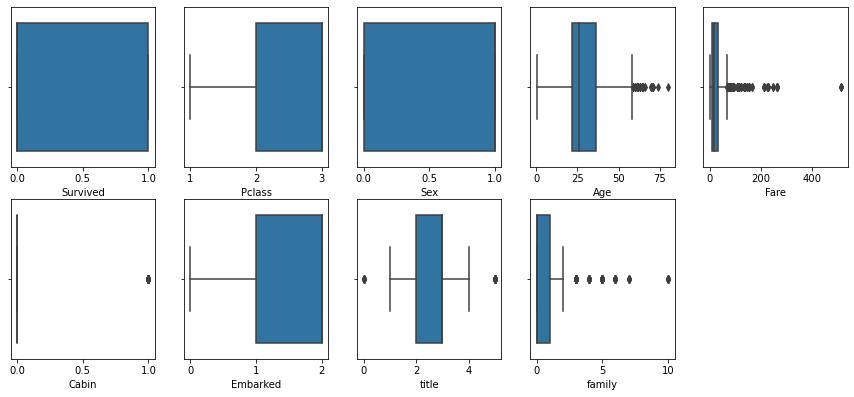

In [21]:
plt.figure(figsize=(15,10))
for i in enumerate(train.columns):
  plt.subplot(3,5,i[0]+1)
  sns.boxplot(train[i[1]])

In [22]:
for i in ['Age','Fare']:
    train[i] = remove(train[i])
    test[i] = remove(test[i])

In [23]:
feature = train.drop('Survived',axis=1)
label = train['Survived']

testf = test.drop('Survived',axis=1)
testl = test['Survived']

from imblearn.combine import SMOTEENN
os = SMOTEENN(random_state=42)
feature,label = os.fit_resample(feature,label)

In [24]:
fitAndScore(feature,label,testf,testl)

[0.8129496402877698, 0.7937649880095923]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

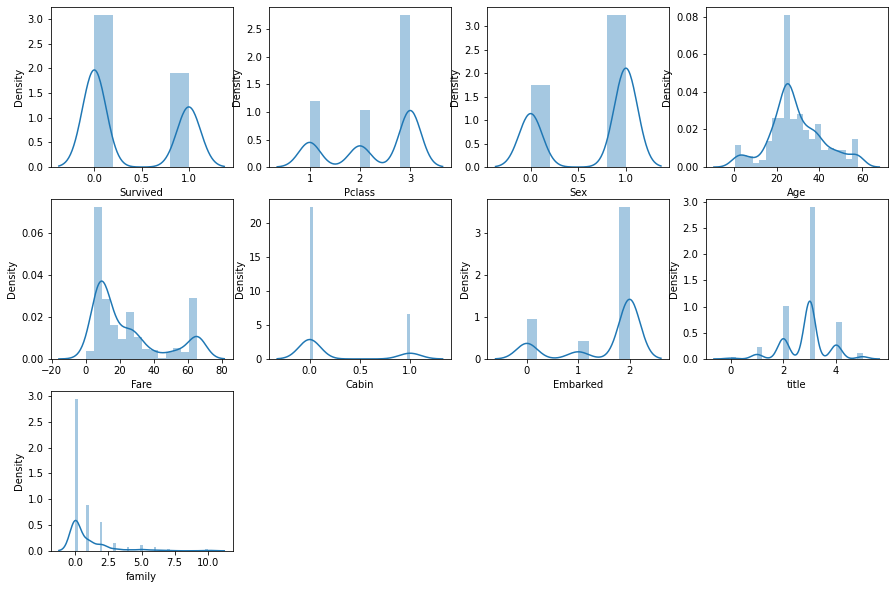

In [25]:
#Transform

plt.figure(figsize=(15,10))
for i in enumerate(train.columns):
  plt.subplot(3,4,i[0]+1)
  sns.distplot(train[i[1]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

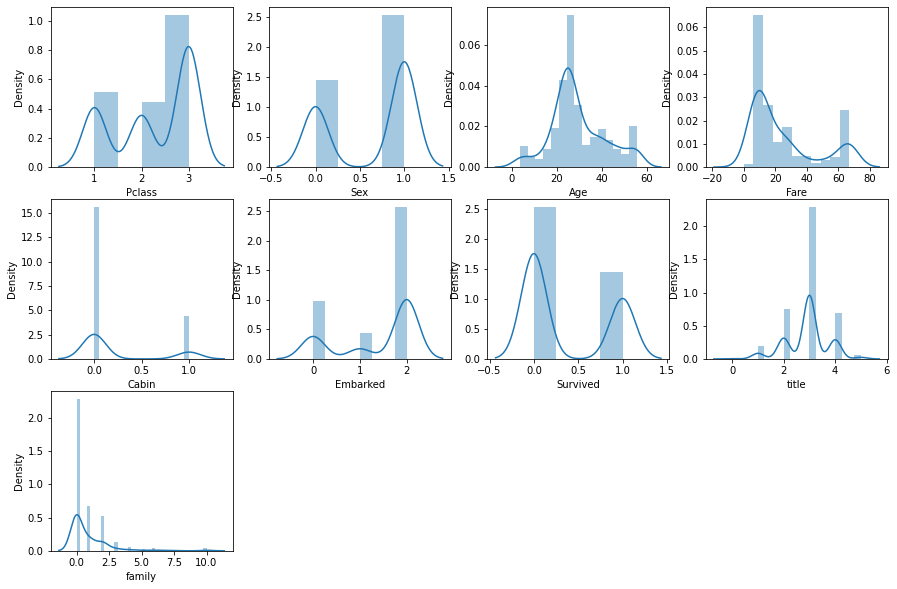

In [26]:
plt.figure(figsize=(15,10))
for i in enumerate(test.columns):
  plt.subplot(3,4,i[0]+1)
  sns.distplot(test[i[1]])

In [27]:
li = ['Age','Fare','family']
from sklearn.preprocessing import  StandardScaler

for i in li:
  train[i] = StandardScaler().fit_transform(train[[i]])
  testf[i] = StandardScaler().fit_transform(testf[[i]])

In [28]:
feature = train.drop('Survived',axis=1)
label = train['Survived']

from imblearn.combine import SMOTEENN
os = SMOTEENN(random_state=42)
feature,label = os.fit_resample(feature,label)

In [29]:
fitAndScore(feature,label,testf,testl)

[0.9112709832134293, 0.9400479616306955]


In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'n_estimators':[x**2 for x in range(3,10)],
    'n_jobs':[-1,None],
    'random_state':[1,42,None],
    'max_depth': [3,5,None]
}

cv = GridSearchCV(random,params,cv=5)
cv.fit(feature,label)
#print(cv._best_params,cv._best_result)

print(cv.best_params_,cv.best_score_)

bestmodel = cv.best_estimator_
bestmodel.score(testf,testl)

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 25, 'n_jobs': None, 'random_state': None} 0.9858267716535434


0.9376498800959233